<>:129: SyntaxWarning: invalid escape sequence '\i'
<>:129: SyntaxWarning: invalid escape sequence '\i'
C:\Users\belis\AppData\Local\Temp\ipykernel_11028\2267257074.py:129: SyntaxWarning: invalid escape sequence '\i'
  indicador = pd.read_excel("C:\\Users\\"+ user +"\\OneDrive\igor\\1. Posgrado\\2. Maestría - MEC\\3. Trabajo de grado\\oce-wasde-report-data-2010-04-to-2015-12.xlsx")


   Estadísticas de traza  Valores críticos (5%)  Decisión
0              83.442158                29.7961      True
1              23.234523                15.4943      True
2               5.151137                 3.8415      True
👉 Número de relaciones de cointegración detectadas: 3
    ReleaseDate   consumo_total   Value         Commodity
0    2016-01-12  Domestic Total  716.14             Wheat
1    2016-01-12   Ending Stocks  232.04             Wheat
2    2016-02-09  Domestic Total  711.41             Wheat
3    2016-02-09   Ending Stocks  238.87             Wheat
4    2016-03-09  Domestic Total  709.37             Wheat
..          ...             ...     ...               ...
703  2015-12-09   Ending Stocks  211.85              Corn
704  2015-12-09  Domestic Total  312.32  Oilseed, Soybean
705  2015-12-09   Ending Stocks   82.58  Oilseed, Soybean
706  2015-12-09  Domestic Total  717.14             Wheat
707  2015-12-09   Ending Stocks  229.86             Wheat

[708 rows x 4 col

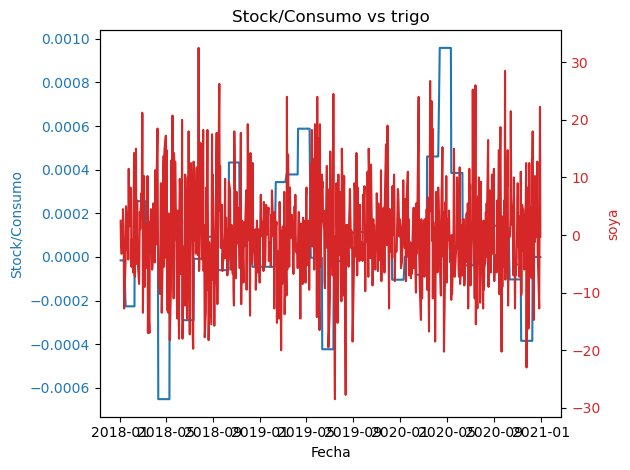

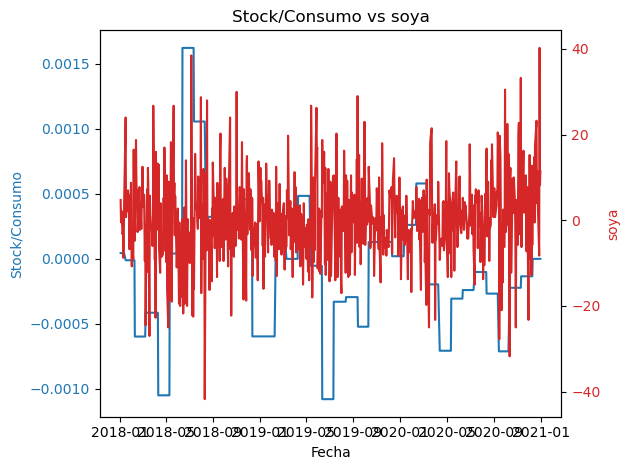

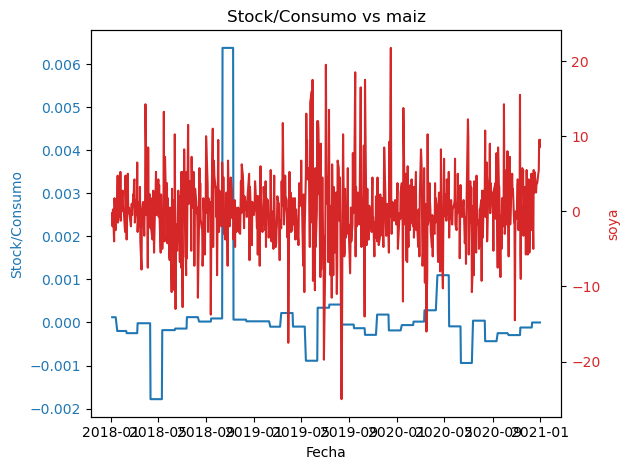

trigo
   Estadísticas de traza  Valores críticos (5%)  Decisión
0             133.908225                95.7542      True
1              65.491818                69.8189     False
2              38.426500                47.8545     False
3              20.739734                29.7961     False
4               8.012834                15.4943     False
5               0.839679                 3.8415     False
👉 Número de relaciones de cointegración detectadas: 1
soya
   Estadísticas de traza  Valores críticos (5%)  Decisión
0              94.614176                47.8545      True
1              28.951697                29.7961     False
2               4.867288                15.4943     False
3               0.005512                 3.8415     False
👉 Número de relaciones de cointegración detectadas: 1
maiz
   Estadísticas de traza  Valores críticos (5%)  Decisión
0             131.583277                95.7542      True
1              48.834666                69.8189     False
2     

In [1]:
import datetime
import os
from time import strftime
import numpy as np
from datetime import timedelta
from itertools import product
from datetime import datetime
import shutil
import pyodbc
import pandas as pd
import pandasql as psql
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression


import os

user = os.getlogin()


# # diccionario de índices
# indices = {"trigo":"ZW=F",
#            "soya":"ZS=F",
#            "maiz":"ZC=F",
#            "petroleo":"CL=F",
#            # "etanol":"EH=F",
#            "engorde":"GF=F",
#            "gas_natural":"NG=F",
#            "diesel":"HO=F"}

# # Baiar las cotizaciones de todos los índices
# for i in indices.keys():
#     if i == list(indices.keys())[0]:
#         locals()[i] =  yf.Ticker(indices[i])
#         hist = locals()[i].history(period="30y")
#         locals()[i] = pd.DataFrame({i:hist.loc["2000":,"Close"]})
#         indices_final = locals()[i].copy()
#     else:
#         locals()[i] =  yf.Ticker(indices[i])
#         hist = locals()[i].history(period="30y")
#         locals()[i] = pd.DataFrame({i:hist.loc["2000":,"Close"]})
#         indices_final = indices_final.merge(locals()[i],left_index=True,right_index=True)


# Graficar las series
precios = pd.read_excel("C:\\Users\\"+ user +"\\OneDrive\\igor\\1. Posgrado\\2. Maestría - MEC\\3. Trabajo de grado\\Precios agro.xlsx",
                        index_col="Unnamed: 0",
                        # parse_dates=True
                        )

# plt.figure(figsize=(10, 5))
# plt.plot(precios, label=list(precios.columns))
# plt.title("Series Cointegradas Simuladas")
# plt.legend()
# plt.show()

# In[Aplicamos el test de iohansen
# 'petroleo', 'engorde', 'gas_natural','diesel'

variables = ['engorde', 'gas_natural']
p = precios.loc[:'2025-02-20',~precios.columns.isin(['soya', 'trigo']+variables)]
result = coint_johansen(p, det_order=0, k_ar_diff=1)

# Mostrar los resultados
resultados = pd.DataFrame({"Estadísticas de traza":result.lr1,
              "Valores críticos (5%)":result.cvt[:, 1]})

resultados["Decisión"] = resultados.iloc[:,0]>resultados.iloc[:,1]
print(resultados)

# Interpretación de cointegración
num_cointegraciones = sum(result.lr1 > result.cvt[:, 1])
print(f"👉 Número de relaciones de cointegración detectadas: {num_cointegraciones}")

# In[3. Estimación del Modelo VECM
# vecm_model = VECM(p, k_ar_diff=1, coint_rank=1)
# vecm_fit = vecm_model.fit()

# # 4. Extraer los parámetros del modelo
# alpha = vecm_fit.alpha  # Parámetros de aiuste (velocidad de corrección)
# beta = vecm_fit.beta    # Matriz de cointegración (relación de largo plazo)
# gamma = vecm_fit.gamma  # Parámetros de rezagos (efectos de corto plazo)

# # 5. Predicción con el modelo VECM
# forecast = vecm_fit.predict(steps=16)
# df_forecast = pd.DataFrame(forecast, columns=p.columns)

# # Mostrar resultados
# print(f"Número de relaciones de cointegración detectadas: {num_cointegraciones}")
# print("Coeficientes de la ecuación de cointegración:")
# print(beta[:, 0])
# print("\nPredicción de los próximos 10 períodos:")
# print(df_forecast.head())

# In[Nueva serie no se usa]

# import pandas as pd
# import pandasql as psql


# commodities = {"trigo":410000,
#             "soya":2222000,
#             "maiz":2631000,
#             "engorde":11000}

# indicador = pd.read_csv("C:\\Users\\"+ user +"\\OneDrive\\igor\\1. Posgrado\\2. Maestría - MEC\\3. Trabajo de grado\\psd_alldata.csv")

# indicador.columns 

# indicador = indicador[(indicador["Commodity_Code"].isin(list(commodities.values()))) & (indicador["Attribute_Description"] == "Production")]

# indicador_paises = indicador["Unit_Description"].drop_duplicates()

# indicador.groupby("cliente")["monto"].sum().reset_index()

# In[Nueva serie no se usa]

commodities = ['Oilseed, Soybean','Corn','Wheat']

indicador1 = pd.read_excel("C:\\Users\\"+ user +"\\OneDrive\\igor\\1. Posgrado\\2. Maestría - MEC\\3. Trabajo de grado\\oce-wasde-report-data-2016-01-to-2020-12.xlsx")
indicador = pd.read_excel("C:\\Users\\"+ user +"\\OneDrive\igor\\1. Posgrado\\2. Maestría - MEC\\3. Trabajo de grado\\oce-wasde-report-data-2010-04-to-2015-12.xlsx")

# 
indicador = pd.concat([indicador1, indicador], ignore_index=True)

indicador = indicador[(indicador["Commodity"].isin(list(commodities)))]# & (indicador["Attribute"] == "Production")]

indicador_paises = indicador["Unit"].drop_duplicates()

indicador["ReleaseDate"] = indicador["ReleaseDate"].astype(str).str[:10]

# indicador.groupby("cliente")["monto"].sum().reset_index()

# In[Consulta SQL estilo clásico
query = """
    SELECT 
    ReleaseDate,
    Attribute as consumo_total,
    Value,
    Commodity
    FROM indicador
    WHERE Attribute in ('Ending Stocks','Domestic Total') and
    Commodity in ('Oilseed, Soybean','Corn','Wheat') 
    and ProjEstFlag = 'Proj.' and Region = 'World'
    --ORDER BY ReleaseDate
    --GROUP BY Commodity_Description
"""

# Eiecutamos la consulta
resultado = psql.sqldf(query, locals())
print(resultado)

resultado["consumo_total"].drop_duplicates()

# resultado.plot()

# In[Tabla dinámica]

pivot = pd.pivot_table(
    resultado,
    values="Value",       # qué valores vamos a resumir
    index="ReleaseDate",       # por qué agrupamos las filas
    columns=["consumo_total","Commodity"],         # qué va en las columnas
    aggfunc="sum",         # función de agregación (puede ser "sum", "count", "mean", etc.)
    fill_value=0           # para reemplazar NaN con 0
)

# Columnas nuevas
for i in ['Oilseed, Soybean','Corn','Wheat']:
    pivot.loc[:,("Stock/Consumo", i)] = pivot.loc[:,("Ending Stocks",i)]/pivot.loc[:,("Domestic Total",i)]

# pivot["Stock/Consumo"].plot()

pivot.index = pd.to_datetime(pivot.index)

precios.index = pd.to_datetime(precios.index,utc=True)

precios.index = pd.to_datetime(precios.index.astype(str).str[:10])

# pivot = pivot.merge(pd.DataFrame(precios["soya"]),left_index=True,right_index =True)

# materias primas
materias_primas = {"trigo":"Wheat",
            "soya":'Oilseed, Soybean',
            "maiz":'Corn'
            }
# Coniunto de datos de las materias primas
for i in materias_primas:
    a = pivot.loc[:,(pivot.columns.droplevel(1),materias_primas[i])]
    a.columns = [f"{a}" for a, b in a.columns]
    locals()[i] = pd.DataFrame(precios).merge(a,how= 'outer',left_index=True,right_index =True)

    # Primero asegurate de que la fecha sea índice datetime
    locals()[i].index = pd.to_datetime(locals()[i].index, dayfirst=True)
    
    # Ahora interpolar todas las columnas numéricas
    locals()[i] = locals()[i].interpolate(method='linear')
    
    # Eliminar los otros granos
    locals()[i].drop(columns=[x for x in list(materias_primas.keys()) if x != i],inplace =True)
    
    # Eliminar los vacíos
    locals()[i].dropna(inplace=True)
    
    locals()[i] = locals()[i].loc["2018":"2020",] #   Siguiendo los resultados de los regímenes se encontró que este es el mejor período de tiempo locals()[i].loc[:pivot.index[-1],]#.iloc[-365*4:-365*2,]

# In[# Crear figura y eie principal]

for i in materias_primas.keys():
    
    fig, ax1 = plt.subplots()
    
    # Eie Y izquierdo - Stock/Consumo
    ax1.set_ylabel("Stock/Consumo", color="tab:blue")
    ax1.plot(locals()[i].index, locals()[i]["Stock/Consumo"].diff(), color="tab:blue", label="Stock/Consumo")
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    
    # Eie Y derecho - soya
    ax2 = ax1.twinx()
    ax2.set_ylabel("soya", color="tab:red")
    ax2.plot(locals()[i].index, locals()[i][i].diff(), color="tab:red", label=i)
    ax2.tick_params(axis="y", labelcolor="tab:red")
    
    # Eie X como fechas del índice
    ax1.set_xlabel("Fecha")
    
    # Título y mostrar
    plt.title("Stock/Consumo vs " + str(i))
    plt.tight_layout()
    plt.show()

# In[Test de cointegracion

variables = {'soya':['Stock/Consumo','petroleo','diesel'], 
             'maiz':['Stock/Consumo','petroleo', 'engorde', 'diesel','gas_natural'],
             'trigo':['Stock/Consumo','petroleo', 'engorde', 'diesel','gas_natural']}


for i in materias_primas.keys():
    result = coint_johansen(locals()[i][variables[i]+[i]], det_order=0, k_ar_diff=1)
    
    # Mostrar los resultados
    resultados = pd.DataFrame({"Estadísticas de traza":result.lr1,
                  "Valores críticos (5%)":result.cvt[:, 1]})
    
    resultados["Decisión"] = resultados.iloc[:,0]>resultados.iloc[:,1]
    print(i)
    print(resultados)
    
    # Interpretación de cointegración
    num_cointegraciones = sum(result.lr1 > result.cvt[:, 1])
    print(f"👉 Número de relaciones de cointegración detectadas: {num_cointegraciones}")